# Opinion Mining / Sentiment Analysis On IMDB Movie Review Data Set

In this analysis, we will analyse and predict the opinion or sentiment( positive/ negative) related to the movie review. We will analyse different machine learning models like Navie Bayes, Logistic regression, random forest and will evaluate their performance.

### Importing necessary libraries

In [38]:
#################################################
##                                             ##
##              Importing Libraries            ##
##                                             ##
#################################################

import numpy as np                                              # Numpy is the core library for scientific computing
import pandas as pd                                             # open source data analysis and manipulation tool
import matplotlib.pyplot as plt                                 # library for creating static, animated, and interactive visualizations
import nltk                                                     # For test pre-processing
import re                                                       # For regular expression
from nltk.corpus import stopwords                               # For stopwords like 'a', 'this', 'those' etc
from nltk.stem.porter import PorterStemmer                      # most popular stemming algorithms 
from sklearn import preprocessing                               # To preprocess the data
import scikitplot as skplt                                      # scikit-plot is an extension of matplotlib for datascientist
from sklearn.feature_extraction.text import CountVectorizer     # simple way to both tokenize a collection of text and build a vocabulary of known words
from sklearn.ensemble import RandomForestClassifier             # Random forests is a supervised learning algorithm
from sklearn.metrics import confusion_matrix,classification_report # metric to evalute performance of classifier
from sklearn.metrics import roc_curve,auc                       # To plot and calculate roc auc 
import warnings
warnings.filterwarnings('ignore')

### Data insites

In [3]:
Movie_df = pd.read_csv("IMDB Dataset.csv")

In [4]:
Movie_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
print("General stats::")
print(Movie_df.info())
print("Summary stats::\n")
print(Movie_df.describe())

General stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
Summary stats::

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     25000


By above observations we can see data set consist of 50000 rows and 2 column
1. review     -> Sentence
2. sentiment  -> Positive / Negative

##### Counting sentiment values

In [7]:
Movie_df.sentiment.value_counts()


negative    25000
positive    25000
Name: sentiment, dtype: int64

* In data set we have
    1. 25000 negative sentiment review
    2. 25000 positive sentiment review

##### spliting columns in new variables reviews and sentiment

In [8]:
reviews=Movie_df['review']
sentiment=Movie_df['sentiment']

##### Insites of new variables

In [10]:
reviews.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [11]:
sentiment.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

##### Unique classes present in sentiment

In [12]:
print('Classes::\n',np.unique(sentiment))

Classes::
 ['negative' 'positive']


There are only two types of classes available
1. negative
2. positive

### Train Test Split

Train Size = 30000
Test Size = 20000

In [14]:
train_reviews=reviews[:30000]
train_sentiment=sentiment[:30000]
test_reviews=reviews[30000:]
test_sentiment=sentiment[30000:]
#Shape of train & test dataset
print('Shape of train dataset::',train_reviews.shape,train_sentiment.shape)
print('Shape of test dataset::',test_reviews.shape,test_sentiment.shape)


Shape of train dataset:: (30000,) (30000,)
Shape of test dataset:: (20000,) (20000,)


### Encoding Target Label using LabelBinarizer

In [15]:
#################################################
##                                             ##
##                 Encoding                    ##
##                                             ##
#################################################

lb=preprocessing.LabelBinarizer()
#Encode 1 for positive label & 0 for Negative label
train_sentiment=lb.fit_transform(train_sentiment)
test_sentiment=lb.transform(test_sentiment)
#Reshape the array
train_sentiment=train_sentiment.ravel()  
test_sentiment=test_sentiment.ravel()
#Convert categoricals to numeric ones
train_sentiment=train_sentiment.astype('int64')
test_sentiment=test_sentiment.astype('int64')

##### insite of encoded values

In [16]:
train_sentiment[0:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [17]:
test_sentiment[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

### Normalization of data

##### Data Before normalization

In [28]:
train_reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [29]:
test_reviews[30001]

'This is one of the silliest movies I have ever had the misfortune to watch! I should have expected it, after seeing the first two, but I keep getting suckered into these types of movies with the idea of "Maybe they did it right this time". Nope - not even close.<br /><br />Where do I begin? How about with the special effects... To give you an idea of what passes for SFX in this movie, at one point a soldier is shooting at a "Raptor" as it runs down a hallway. Even with less than a second of screen time, the viewer can easily see that it is just a man with a tail apparently taped to him running around. Bad bad bad bad.<br /><br />How about the acting? If that\'s what you can call it. There is one character who, I suppose, is supposed to be from the south. However, after living in the south for six years now, I have never heard this way of talking. Perhaps he has some sort of weird disability - the inability to talk normally. I find it fascinating that the character does nothing that re

* ##### In above paragraphs, we can observe stopwords,html tags,special charcters & numbers, which are not required for sentiment analysis.So we need to remove those by normalizing the review data to reduce dimensionality & noise in the data.

#### Data Pre-processing

###### Let's normalize our data to remove stopwords, html tags and so on.

In [18]:
########################################################
##                                                    ##
##        Text Normalization and Pre-processing       ##
##                                                    ##
########################################################

nltk.download('stopwords')
from nltk.corpus import stopwords

ps=PorterStemmer()
# stopword are like ('a','the', 'this' etc)
stopwords=set(stopwords.words('english'))

# Define function for data mining
def normalize_reviews(review):
    #Excluding html tags
    data_tags=re.sub(r'<[^<>]+>'," ",review)
    #Remove special characters/whitespaces
    data_special=re.sub(r'[^a-zA-Z0-9\s]','',data_tags)
    #converting to lower case
    data_lowercase=data_special.lower()
    #tokenize review data
    data_split=data_lowercase.split()
    #Removing stop words
    meaningful_words=[w for w in data_split if not w in stopwords]
    #Appply stemming
    text= ' '.join([ps.stem(word) for word in meaningful_words])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Normalize the train & test data

In [19]:
norm_train_reviews=train_reviews.apply(normalize_reviews)
norm_test_reviews=test_reviews.apply(normalize_reviews)

#### Let's look at our normalized data

In [39]:
norm_train_reviews[0]


'one review mention watch 1 oz episod youll hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort u

In [40]:
norm_test_reviews[30001]

'one silliest movi ever misfortun watch expect see first two keep get sucker type movi idea mayb right time nope even close begin special effect give idea pass sfx movi one point soldier shoot raptor run hallway even less second screen time viewer easili see man tail appar tape run around bad bad bad bad act that call one charact suppos suppos south howev live south six year never heard way talk perhap sort weird disabl inabl talk normal find fascin charact noth requir accent therefor reason actor tri one plot pretti basic raptor escap peopl gun must hunt im start wonder dinosaur movi alway seem run nearest system tunnel wouldnt stay outsid hunt prey oh well least good sens appear littl movi supposedli revolv around thing let say build know man eat raptor run around would decid take time argument better armi marin decid arm wrestl contest settl idiot idea track raptor split group two didnt ever watch horror movi least episod scoobi doo short one dumber movi miss unless want groan way m

#### Now we will use CountVectorizer

Q. Why CountVectorizer?

CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [20]:
cv=CountVectorizer(ngram_range=(1,2))
train_cv=cv.fit_transform(norm_train_reviews)
test_cv =cv.transform(norm_test_reviews)
print('Shape of train_cv::',train_cv.shape)
print('Shape of test_cv::',test_cv.shape)

Shape of train_cv:: (30000, 1929440)
Shape of test_cv:: (20000, 1929440)


Our train & test dataset contains 1929440 attributes each.

Let's build/train and test traditional ML models

### 1. Random Forest Classifier

In [21]:
%%time
# Training the classifier
rfc=RandomForestClassifier(n_estimators=20,random_state=42)
rfc=rfc.fit(train_cv,train_sentiment)
score=rfc.score(train_cv,train_sentiment)
print('Accuracy of trained model is ::',score)

Accuracy of trained model is :: 0.9996
Wall time: 6min 27s


In [22]:
%%time
# Making predicitions
rfc_predict=rfc.predict(test_cv)

Wall time: 4.7 s


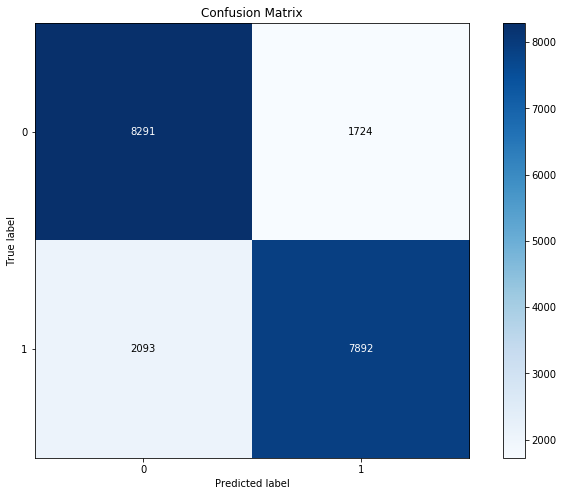

In [23]:
# How accuate our model is?
cm=confusion_matrix(test_sentiment,rfc_predict)
# plot our confusion matrix
skplt.metrics.plot_confusion_matrix(test_sentiment,rfc_predict,normalize=False,figsize=(12,8))
plt.show()

0-Negative class, 1-Positive class

From the confusion matrix plot, it is concluded that, the Random Forest classifier with 20 decision trees classified the 81% of the reviews (16183 reviews) correctly & remaining 19% of reviews (3817 reviews) are misclassified.

In [24]:
# print classification report for performance metrics
cr=classification_report(test_sentiment,rfc_predict)
print('Classification report is::\n',cr)


Classification report is::
               precision    recall  f1-score   support

           0       0.80      0.83      0.81     10015
           1       0.82      0.79      0.81      9985

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [25]:
fpr_rf,tpr_rf,threshold_rf=roc_curve(test_sentiment,rfc_predict)
# Area under curve (AUC) score, fpr-False Positive rate, tpr-True Positive rate
auc_rf=auc(fpr_rf,tpr_rf)
print('AUC score for Random Forest classifier::',np.round(auc_rf,3))

AUC score for Random Forest classifier:: 0.809


### 2. Multinomial Navie Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mnb=MultinomialNB()
mnb=mnb.fit(train_cv,train_sentiment)
score=mnb.score(train_cv,train_sentiment)
print('Accuracy of trained model is ::',score)

Accuracy of trained model is :: 0.997


In [28]:
%%time
#Making predicitions
mnb_predict=mnb.predict(test_cv)

Wall time: 275 ms


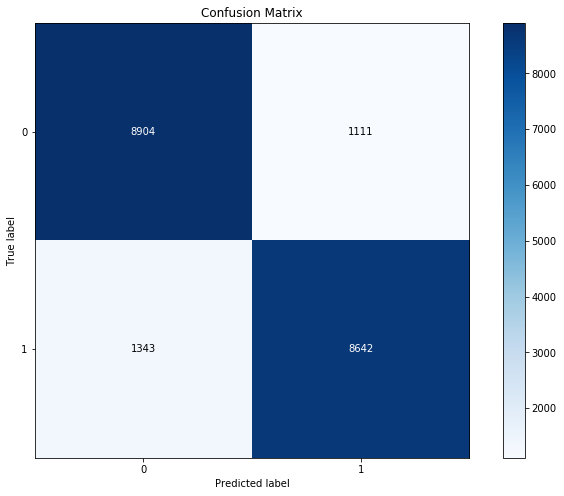

In [29]:
#How accuate our model is?
cm=confusion_matrix(test_sentiment,mnb_predict)
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(test_sentiment, mnb_predict, normalize=False, figsize=(12,8))
plt.show()

In [30]:
#print classification report for performance metrics
cr=classification_report(test_sentiment,mnb_predict)
print('Classification report is::\n',cr)


Classification report is::
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     10015
           1       0.89      0.87      0.88      9985

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [31]:
fpr_mnb, tpr_mnb, threshold_mnb = roc_curve(test_sentiment,mnb_predict)
#Area under curve (AUC) score, fpr-False Positive rate, tpr-True Positive rate
auc_mnb = auc(fpr_mnb,tpr_mnb)
print('AUC score for Multinomial Navie Bayes::', np.round(auc_mnb,3))

AUC score for Random Forest classifier:: 0.877


### 3. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
lr = lr.fit(train_cv,train_sentiment)
score = lr.score(train_cv,train_sentiment)
print('Accuracy of trained model is ::',score)

C:\Users\Me\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of trained model is :: 1.0


In [39]:
%%time
#Making predicitions
lr_predict = lr.predict(test_cv)

Wall time: 66.3 ms


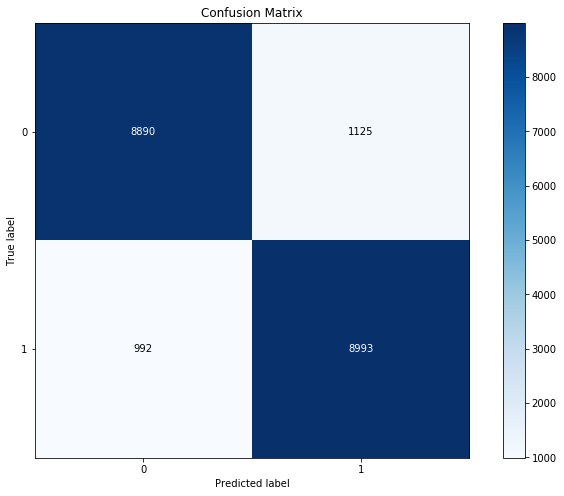

In [40]:
#How accuate our model is?
cm = confusion_matrix(test_sentiment, lr_predict)
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(test_sentiment, lr_predict, normalize=False, figsize=(12,8))
plt.show()

In [41]:
#print classification report for performance metrics
cr = classification_report(test_sentiment, lr_predict)
print('Classification report is::\n',cr)

Classification report is::
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     10015
           1       0.89      0.90      0.89      9985

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



In [42]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(test_sentiment, lr_predict)
#Area under curve (AUC) score, fpr-False Positive rate, tpr-True Positive rate
auc_lr = auc(fpr_lr, tpr_lr)
print('AUC score for Logistic Regression::', np.round(auc_lr, 3))

AUC score for Logistic Regression:: 0.894


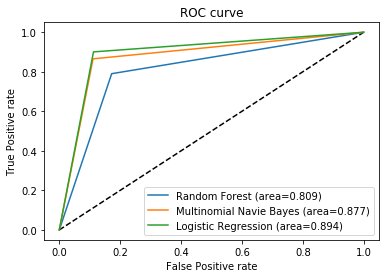

In [43]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='Random Forest (area={:.3f})'.format(auc_rf))
plt.plot(fpr_mnb,tpr_mnb,label='Multinomial Navie Bayes (area={:.3f})'.format(auc_mnb))
plt.plot(fpr_lr,tpr_lr,label='Logistic Regression (area={:.3f})'.format(auc_lr))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Word cloud for positive review words

<function matplotlib.pyplot.show(*args, **kw)>

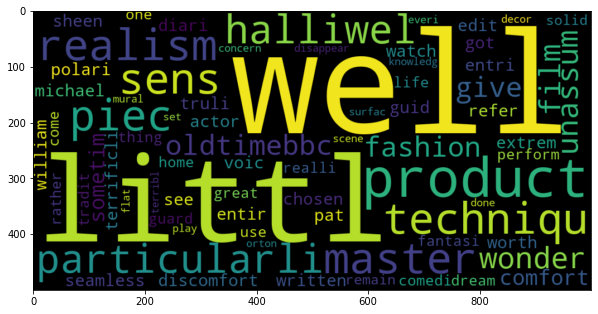

In [61]:
from wordcloud import WordCloud

#Word cloud for negative review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

##### Word cloud for negative review words

<function matplotlib.pyplot.show(*args, **kw)>

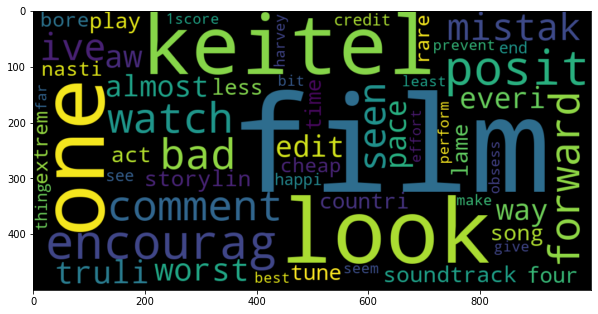

In [62]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

## Conclusion:

* We can observed that both logistic regression and multinomial naive bayes model performing well compared to random forest classifier.

* Thus we can use any of the model suggested above to perdict the sentiment or opinion.

* We can further improve the accuracy using deep learning models.

* Still we can improve the accuracy of the models by preprocessing data and by using lexicon models like Textblob.